# 第7-8次实验实验报告
计算机系 计15 2021010803 郭高旭

## 第7.5题：

### 问题分析与算法设计
问题要求根据平面中许多原子对的相对位置，求解每个原子的精确位置。为此设第i个原子的i求得坐标为$(x_i, y_i)$，则i，j两原子的i距离为$d_{ij} = \sqrt{(x_i - x_j)^2 + (y_i - y_j)^2}$。根据题意，可以得到计算距离与实际距离的误差$\delta d$.
综上，可以把原问题转换为一个优化问题。其中决策变量为每个原子的坐标，目标函数为误差的平方和，约束条件为原子之间的距离。可以使用梯度下降法求解。

### 代码实现与结果

Optimization was successful, the minimum error is:  0.00787576049984286


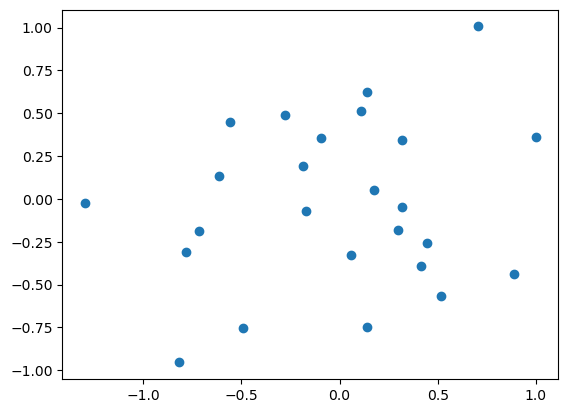

point 1:(0.3,-0.182)
point 2:(-0.493,-0.755)
point 3:(-0.276,0.49)
point 4:(-0.615,0.136)
point 5:(-0.782,-0.311)
point 6:(0.416,-0.392)
point 7:(0.32,0.342)
point 8:(0.175,0.051)
point 9:(-0.096,0.358)
point 10:(0.446,-0.256)
point 11:(0.141,-0.749)
point 12:(0.518,-0.566)
point 13:(0.139,0.622)
point 14:(0.11,0.511)
point 15:(-0.189,0.191)
point 16:(-0.718,-0.185)
point 17:(-0.82,-0.954)
point 18:(-0.556,0.451)
point 19:(-0.172,-0.073)
point 20:(0.32,-0.045)
point 21:(0.704,1.006)
point 22:(0.889,-0.438)
point 23:(0.999,0.362)
point 24:(-1.298,-0.023)
point 25:(0.057,-0.327)


In [155]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

dataset ={
    'indeces' : np.array(    [
        [4, 1],
        [12, 1],
        [13, 1],
        [17, 1],
        [21, 1],
        [5, 2],
        [16, 2],
        [17, 2],
        [25, 2],
        [5, 3],
        [20, 3],
        [21, 3],
        [24, 3],
        [5, 4],
        [12, 4],
        [24, 4],
        [8, 6],
        [13, 6],
        [19, 6],
        [25, 6],
        [8, 7],
        [14, 7],
        [16, 7],
        [20, 7],
        [21, 7],
        [14, 8],
        [18, 8],
        [13, 9],
        [15, 9],
        [22, 9],
        [11, 10],
        [13, 10],
        [19, 10],
        [20, 10],
        [22, 10],
        [18, 11],
        [25, 11],
        [15, 12],
        [17, 12],
        [15, 13],
        [19, 13],
        [15, 14],
        [16, 14],
        [20, 16],
        [23, 16],
        [18, 17],
        [19, 17],
        [20, 19],
        [23, 19],
        [24, 19],
        [23, 21],
        [23, 22],
    ]),
    'distances':np.array(
        [
        0.9607,
        0.4399,
        0.8143,
        1.3765,
        1.2722,
        0.5294,
        0.6144,
        0.3766,
        0.6893,
        0.9488,
        0.8,
        1.109,
        1.1432,
        0.4758,
        1.3402,
        0.7006,
        0.4945,
        1.0559,
        0.681,
        0.3587,
        0.3351,
        0.2878,
        1.1346,
        0.387,
        0.7511,
        0.4439,
        0.8363,
        0.3208,
        0.1574,
        1.2736,
        0.5781,
        0.9254,
        0.6401,
        0.2467,
        0.4727,
        1.384,
        0.4366,
        1.0307,
        1.3904,
        0.5725,
        0.766,
        0.4394,
        1.0952,
        1.0422,
        1.8255,
        1.4325,
        1.0851,
        0.4995,
        1.2277,
        1.1271,
        0.706,
        0.8052,
    ]
    )

}

def calc_dij(x_vec,p_i,p_j):
    x_i=x_vec[2*(p_i-1)]
    y_i=x_vec[2*(p_i-1)+1]
    x_j=x_vec[2*(p_j-1)]
    y_j=x_vec[2*(p_j-1)+1]
    d_ij=np.sqrt((x_i-x_j)**2+(y_i-y_j)**2)
    return d_ij



def object_function(x_vec):
    error_sum=0
    for i in range(0, len(dataset['indeces'])):
        p_i=dataset['indeces'][i][0]
        p_j=dataset['indeces'][i][1]
        d_ij=dataset['distances'][i]
        x_i=x_vec[2*(p_i-1)]
        y_i=x_vec[2*(p_i-1)+1]
        x_j=x_vec[2*(p_j-1)]
        y_j=x_vec[2*(p_j-1)+1]
        d_ij_hat=np.sqrt((x_i-x_j)**2+(y_i-y_j)**2)
        error = (d_ij_hat-d_ij)**2
        error_sum+=error
    return error_sum



while(True):
    x0=np.random.uniform(-0.5,0.5,50)
    result = minimize(object_function, x0, method='BFGS', options={'maxiter':1000})
    if(result.success):
        if(result.fun<1e-2):
            print('Optimization was successful, the minimum error is: ', result.fun)
            break
    else:
        print('Optimization was not successful')

points = result.x.reshape(-1, 2)

# Plot the points,using scatter plot
plt.scatter(points[:, 0], points[:, 1])
plt.show()

#print the cooridinate of the points

for index,point in enumerate(points):
    print(f"point {index+1}:({np.round(point[0], 3)},{np.round(point[1], 3)})")

### 结果分析
经过多次尝试,BFGS的迭代次数较少，表现比较好。最终求得的a最小误差的平方和为0.0161,每个原子位置如上图所示。为了解决结果是局部最优而不是全局最优的问题,采用了多次随机初始化的方法，最终得到了较好的结果。

### 结论
点的相对坐标为
```
point 1:(0.3,-0.182)
point 2:(-0.493,-0.755)
point 3:(-0.276,0.49)
point 4:(-0.615,0.136)
point 5:(-0.782,-0.311)
point 6:(0.416,-0.392)
point 7:(0.32,0.342)
point 8:(0.175,0.051)
point 9:(-0.096,0.358)
point 10:(0.446,-0.256)
point 11:(0.141,-0.749)
point 12:(0.518,-0.566)
point 13:(0.139,0.622)
point 14:(0.11,0.511)
point 15:(-0.189,0.191)
point 16:(-0.718,-0.185)
point 17:(-0.82,-0.954)
point 18:(-0.556,0.451)
point 19:(-0.172,-0.073)
point 20:(0.32,-0.045)
point 21:(0.704,1.006)
point 22:(0.889,-0.438)
point 23:(0.999,0.362)
point 24:(-1.298,-0.023)
point 25:(0.057,-0.327)
```

## 第8题：
### 问题分析与模型建立

具体模型已经在原题中给出，即$Q(K,L)=a K^{\alpha}L^{\beta}$，其中$\alpha$和$\beta$为参数，K和L分别为资本和劳动。根据题意,需要用线性和非线性最小二乘法拟合求出式中的$\alpha$和$\beta$和a。
由于原目标函数显然不是线性的,我们可以对其取对数，得到$\ln Q = \ln a + \alpha \ln K + \beta \ln L$。这样就可以用线性最小二乘法求解。

### 代码实现与结果


In [6]:
import numpy as np
A = [
    [0.7171, 0.0910, 4.8197],
    [0.8964, 0.2543, 4.9873],
    [1.0202, 0.3121, 5.1282],
    [1.1962, 0.3792, 5.2783],
    [1.4928, 0.4754, 5.4334],
    [1.6909, 0.4410, 5.5329],
    [1.8548, 0.4517, 6.4749],
    [2.1618, 0.5595, 6.5491],
    [2.6638, 0.8080, 6.6152],
    [3.4634, 1.3072, 6.6808],
    [4.6759, 1.7042, 6.7455],
    [5.8478, 2.0019, 6.8065],
    [6.7885, 2.2914, 6.8950],
    [7.4463, 2.4941, 6.9820],
    [7.8345, 2.8406, 7.0637],
    [8.2068, 2.9854, 7.1394],
    [8.9468, 3.2918, 7.2085],
    [9.7315, 3.7314, 7.3025],
    [10.4791, 4.3500, 7.3740]
]

# 将矩阵A转换成NumPy数组
A_np = np.array(A)

# 分别提取Q, K, L作为单独的数组
Q = A_np[:, 0]
K = A_np[:, 1]
L = A_np[:, 2]


In [96]:
#线性最小二乘法
import numpy as np
from scipy.optimize import minimize

# 定义变换后的线性模型
def linear_model(params, K, L):
    a=params[0]
    alpha=params[1]
    beta=params[2]
    return np.log(a) + alpha * np.log(K) + beta * np.log(L)

def liner_error_function(params):
    predicted_Q = linear_model(params, K, L)
    return np.sum((np.log(Q) - predicted_Q)**2)

x0=np.random.uniform(0.1,1.5,3)
# 使用curve_fit进行线性最小二乘拟合
params_initial_guess_linear= minimize(liner_error_function, x0=x0 ,method='BFGS', options={'maxiter':1000})

print(params_initial_guess_linear)

# 从线性模型参数中恢复原始模型参数


print("Linear least squares: a , alpha ,beta =",np.exp(params_initial_guess_linear.x))


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.3124297301830113
        x: [ 3.024e-01  6.522e-01  1.287e+00]
      nit: 37
      jac: [ 7.823e-08 -3.725e-09  2.608e-08]
 hess_inv: [[ 2.986e+00  6.426e-01 -5.360e+00]
            [ 6.426e-01  1.611e-01 -1.155e+00]
            [-5.360e+00 -1.155e+00  9.631e+00]]
     nfev: 196
     njev: 49
Linear least squares: a , alpha ,beta = [1.35316874 1.9197469  3.6201603 ]


In [122]:
#非线性最小二乘
def non_linear_model(params, K, L):
    a=params[0]
    alpha=params[1]
    beta=params[2]
    return a*K**alpha*L**beta
def non_liner_error_function(params):
    predicted_Q = non_linear_model(params, K, L)
    return np.sum((Q - predicted_Q)**2)

x0=np.random.uniform(0.1,1.5,3)
params_initial_guess_linear= minimize(non_liner_error_function, x0=x0 ,method='BFGS', options={'maxiter':1000})
print(params_initial_guess_linear)
print("Linear least squares: a , alpha ,beta =",params_initial_guess_linear.x)

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 1.4932285758249408
        x: [ 1.034e+00  7.751e-01  6.136e-01]
      nit: 109
      jac: [ 1.948e-04  2.816e-05  3.812e-04]
 hess_inv: [[ 9.690e+00  5.424e-01 -5.079e+00]
            [ 5.424e-01  3.413e-02 -2.863e-01]
            [-5.079e+00 -2.863e-01  2.664e+00]]
     nfev: 783
     njev: 193
Linear least squares: a , alpha ,beta = [1.0338791  0.77505925 0.61362788]


### 结果分析

- 两问均正常求出结果,其中第一问参数值为$\alpha=1.920,\beta=3.620,a=1.353$，第二问参数值为$\alpha=0.775,\beta=0.614,a=1.033$。
- 在随机化初始值(0.1,1.5)时,上面的结果在4位有效数字上是稳定的。
- 两种方案的结果有i一定的差异.

### 结论
对非线性拟合方法的误差值开方再取自然对数可知，非线性拟合的精度大于线性拟合。
在 Cobb-Douglas 函数的各个参数中，代表资金投入对于总产值的重要性系数，即随着更多资金的投入，总产值增加的线性程度。如果 $\alpha$> 1，则说明随着资金投入的增加，总产值以更快的速度增加。同理，$\beta$代表劳动力投入对于总产值增加的重要程度。通过确定$\alpha$和$\beta$以其相对数量关系，则可以得出增加哪一项的投入更能更快地提高总产值，获得更大的收益。

### 意义
这两个问题都是典型的最小二乘法问题，通过这两个问题的练习，我对最小二乘法有了更深的理解。

## 第8.6题：

### 问题分析与模型建立
假设有五种证券,它们的购买金额分别为$x_1,x_2,x_3,x_4,x_5$,现要在以下限制下求解收益的最大值,其中收益f(x)为目标函数:
$$
f(x) = (4.3x_1 + 2.7x_2 + 2.5x_3 + 2.2x_4 + 4.5x_5)*10^{-2}
$$

1. 政府及代办机构的证券至少购进400:  
   $x_2+x_3+x_4 \geq 400$
2. 平均信用等级S不高于1.4:  
   $S=\frac{(2x_1+2x_2+x_3+x_4+5x_5)}{(x_1+x_2+x_3+x_4+x_5)} \geq 1.4$
   将其转化为$2x_1+2x_2+x_3+x_4+5x_5 \leq 1.4(x_1+x_2+x_3+x_4+x_5)$
3. 平均到期年限N不高于5年:  
   $N=\frac{(9x_1+15x_2+4x_3+3x_4+2x_5)}{(x_1+x_2+x_3+x_4+x_5)} \geq 5$
   将其转化为$(9x_1+15x_2+4x_3+3x_4+2x_5) \leq 5(x_1+x_2+x_3+x_4+x_5)$

除此之外,还要考虑通常的限制比如lb,ub等。
#### 第一问
资金小于等于1000:
$ x_1+x_2+x_3+x_4+x_5 \leq 1000$
#### 第二问
考虑额外的成本,需要修改目标函数,在收益中减去借贷的成本,由于在第一问中已经求出收益率大于借贷的利率,所以为了最大化收益,只需要借满100万元即可,这时限制资金变成1100.
#### 第三问
同样要修改目标函数,将系数变为修改后的收益.

### 代码实现与结果

In [116]:
import numpy as np
from scipy.optimize import linprog

A_ub = np.array([[0, -1, -1, -1, 0, ],
              [2 - 1.4, 2 - 1.4, 1 - 1.4, 1 - 1.4, 5 - 1.4, ],
              [9 - 5, 15 - 5, 4 - 5, 3 - 5, 2 - 5, ],
              [1, 1, 1, 1, 1, ],
             ])
b_ub = np.array([-400, 0, 0, 1000,])
c = -np.array([4.3, 5.4 * 0.5, 5.0 * 0.5, 4.4 * 0.5, 4.5]) / 100

q1=linprog(c=c,A_ub=A_ub,b_ub=b_ub,bounds=(0,1000),method='highs')
if(q1.success):
    print("q1 succeed , x= ",q1.x," max interest is " ,-q1.fun)

b_ub2=b_ub.copy()
b_ub2[3]=1100
q2=linprog(c=c,A_ub=A_ub,b_ub=b_ub2,bounds=(0,1100),method='highs')
if(q2.success):
    print("q2 succeed , x= ",q2.x," max interest is " ,-q2.fun)

c3=c.copy()
c3[0]=-4.5/100
q3=linprog(c=c3,A_ub=A_ub,b_ub=b_ub,bounds=(0,1000),method='highs')
if(q3.success):
    print("q3 succeed , x= ",q3.x," max interest is " ,-q3.fun)

c4=c.copy()
c4[2]=-2.4/100
q4=linprog(c=c4,A_ub=A_ub,b_ub=b_ub,bounds=(0,1000),method='highs')
if(q4.success):
    print("q4 succeed , x= ",q4.x," max interest is " ,-q4.fun)

q1 succeed , x=  [218.18181818   0.         736.36363636   0.          45.45454545]  max interest is  29.836363636363636
q2 succeed , x=  [240.   0. 810.   0.  50.]  max interest is  32.82
q3 succeed , x=  [218.18181818   0.         736.36363636   0.          45.45454545]  max interest is  30.272727272727273
q4 succeed , x=  [336.   0.   0. 648.  16.]  max interest is  29.424


### 结果分析

所有计算均正常推出,最终结果见上表.

### 结论
- 第1问:A投资218.18万元,C投资736.36万元,E投资45.45万元,B,D投资0万元
- 第2问:A投资240万元,C投资810万元,E投资50万元,B,D投资0万元,借款100万元
- 第3问:证券 A 的税前收益增加 4.5% 后投资不会改变，证券 C 的税前收益减少为 4.8% 后投资应该改变,分别投入[336.   0.   0.  648.  16.]万元

### 意义
这个问题的求解对于投资者来说是非常有意义的，可以帮助投资者合理分配资金，最大化收益。
